# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 4</p>
### <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Wed, **Nov, 3rd** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Emilio Cabrera

EID: EAC4622

# Question 1: Reject option (10 pts)

Consider a binary classification problem with the following loss matrix, where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C_1 & C_2 & Reject\\
   \text{True class} & C_1 & 0 & 2 & c  \\
   & C_2 & 4 & 0 & c \\
  \end{array} } 
$$

If $c$ = 1, determine the respective predicted classes that will minimize the expected loss when $P(C_1|x)$ falls in different value intervals. That is, please give the decision rules for $C_1$, $C_2$ and $Reject$.

Populating the interactive namespace from numpy and matplotlib


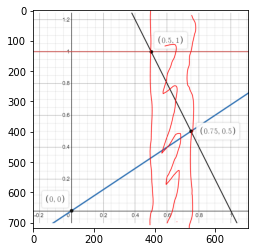

In [9]:
## Answer:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Q1_Graph.png')
imgplot = plt.imshow(img)
plt.show()

- x < 0.50, then Class 2
- 0.50< x <0.75 , then Reject
- x > 0.75, then Class 1

# Question 2: Logistic Regression (15 pts) 

Logistic regression has been traditionally used to classify data when a **linear decision boundary** is adequate. However, having an idea of what the distribution looks like could help one come up with a smart data transformation trick that could make the optimal decision boundary become (near) linear in the transformed space. In this question, you are given 2-dimensional data, and each data point belongs to either class 0 or class 1. 

a) **(5 pts)** Train a logistic regression classifier using X_train, y_train. Use the trained model to make predictions on X_train, X_test respectively, and then report the accuracies and F1-scores. Sklearn has a very nice [utility](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that helps compute the precision, recall, accuracy and F1-scores. 

b) **(5 pts)** Plot the X_train data using matplotlib, use different colors to represent different classes. Comment on the pattern of data distributions, and reason why the logistic regression classifier in (a) does not perform very well.  

c) **(5 pts)** Transform the input X_train and X_test data in such a way that a linear decision boundary will be effective. Train a new logistic regression classifier on this transformed X_train data. Use the trained model to make predictions on transformed X_train, transformed X_test respectively, and then report the accuracies and F1-scores. 

**Hint**: Carefully analyze the plot you made in (b), observe the decision boundaries, which should guide you towards the right direction.

In [1]:
import numpy as np
import pandas as pd
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

data = np.load('q2_data.npy', allow_pickle=True)
X_train, y_train = data.item().get('X_train'), data.item().get('y_train')
X_test, y_test = data.item().get('X_test'), data.item().get('y_test')

# Q1.A (5 pts) 

In [2]:
#A) - X TRAIN
log_model_a = LogisticRegression()
fit_a = log_model_a.fit(X_train, y_train)
pred_a = log_model_a.predict(X_train)
print("X TRAIN\n", classification_report(y_train,pred_a))

#B) - X TEST
log_model_b = LogisticRegression()
fit_b = log_model_b.fit(X_train, y_train)
pred_b = log_model_b.predict(X_test)
print("X TEST\n", classification_report(y_test,pred_b))

X TRAIN
               precision    recall  f1-score   support

       False       0.71      1.00      0.83       214
        True       0.00      0.00      0.00        86

    accuracy                           0.71       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.71      0.59       300

X TEST
               precision    recall  f1-score   support

       False       0.69      1.00      0.82        69
        True       0.00      0.00      0.00        31

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Emilio Cabrera\anac

# Q1.B (5 pts) 

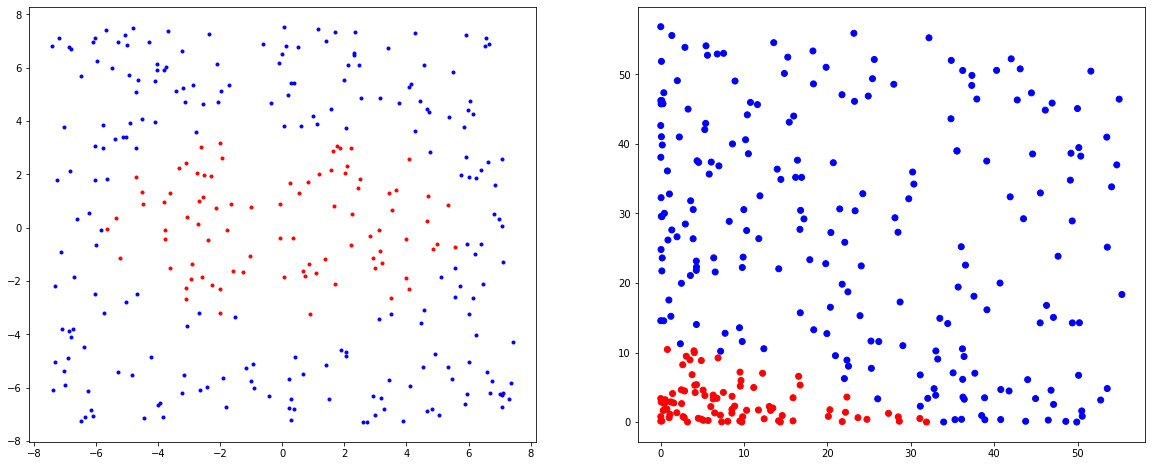

In [3]:
import matplotlib.pyplot as plt

y_tr_col = ['red' if i else 'blue' for i in y_train]

f, ax=plt.subplots(1, 2, figsize = (20,8))
for xy, c in zip(X_train,y_tr_col):
    ax[0].plot(xy[0], xy[1], '.', color=c, picker=True)
ax[1].scatter(pow(X_train[:,0],2), pow(X_train[:,1],2), color=y_tr_col, picker=True)

# Q1.C (5 pts) 

# Question 3: Bayesian Network (5 pts)

A Bayesian network is a directed acyclic graph (DAG) that captures a subset of the independence relationships of a given joint probability distribution. 

In a Bayesian network $G=(V,E)$, each node $i \in V$in the directed graph corresponds to a random variable and each directed edge $e \in E$ represents a statistical dependence. Each node is associated with a conditional probability distribution of the corresponding random variables given its parents in the DAG. The joint probability distribution factorizes w.r.t the directed graph $G$ if $p(x_1, ..., x_n)=\prod_{i \in V} p(x_i | x_{parents(i)})$, provided the variables are visited in a topologically sorted order. Please write the joint probability distribution that factorizes w.r.t this graph, in as simple a form as possible (i.e. that results in the smallest possible conditional probability tables:


In [5]:
%%html
<iframe src="https://drive.google.com/file/d/1XigbvsWpNvlols3QarVjDfYf2Dnf3emy/preview" width="640" height="480" allow="autoplay"></iframe>

## Answer:

PRODUCT:
P(A) * P(B|A) * P(D|B) * P(E|B) *P(C|A,E) * P(F|D, E, C)

# Question 4: Counterfactuals (25 pts)


To show the effectiveness of a newly proposed model, one needs to compare it with multiple  existing solutions, across multiple datasets with different properties, and typically using multiple evaluation metrics. 

One of the emerging requirements in industry is to be able to explain decisions, and counterfactual (CF) explanations turn out to be a lead contender. Hence a new CF approach also needs to be evaluated comprehensively. See [1] for a review on conterfactual explanations. 

An example of a short comparative testing for CFs is given in [2], (you don’t need to understand the method in [2] since I have not covered this type of techinques in class, just see the result tables). The goal of this question is to **try to obtain results that are similar to those reported in [2]** (note that they give details of their model settings in the appendix). In particular, you will evaluate the following datasets: Breast Cancer, Pima diabetes and Adult Census across 5 metrics (Validity, sparsity, proximity, diversity, in-distributionness). 

**Note**: **Section A** students only need to report on the **Breat Cancer and Adult Census datasets** while **Section B** students only need to report results on the **Pima diabetes and Adult Census datasets**.

[1] Verma, Dickerson, Hines. Counterfactual Explanations for Machine Learning: A Review. [arXiv:2010.10596](https://arxiv.org/abs/2010.10596) (2020) 

[2] Samoilescu, et al. Model-agnostic and Scalable Counterfactual Explanations via Reinforcement Learning.  [arXiv:2106.02597](https://arxiv.org/abs/2106.02597) (2021) 


a) Train **Random Forest, MLP and Logistic Regression** models on your datasets and report the accuracies on each of the datasets, show the accuracy on both the training and test set in a table.

Use the code snippets given below to load the datasets and make the split using the following code snippet: ```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)``` 

```
# Breast cancer dataset, for Section A only
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

# Pima Diabetes dataset, for Section B only
def load_diabetes():
  df = pd.read_csv('diabetes.csv')
  X = df.drop(['Outcome'], axis=1)
  y = df[['Outcome']]
  return X, np.reshape(y, (-1, ))

X, y = load_diabetes()

# adult census dataset, for Section A and Section B
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
```


b) For each of the datasets, plot the calibration curves for the entire dataset. The [module](https://scikit-learn.org/stable/modules/calibration.html) from sklearn should help.

For each dataset, the calibration curve should show a y=x line as the perfect calibration, as well as the calibration curves for each of the model predictions. Mark the plots correctly using a legend.

c) [DiCE](https://github.com/interpretml/DiCE) is an open-source library that is based on the paper [Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations](https://arxiv.org/abs/1905.07697). The codebase has 3 methods in which they generate counterfactuals - random sampling, KD-tree and genetic algorithm. Use DiCE (random) and DiCE (genetic) to generate 5 counterfactuals each for the first 50 data point in the test set for each of the models. Report the following metrics for each of the datasets and each of the models. So essentially, you will need to create a table for each dataset where the metrics are present in the columns and each row represents a different model. 

Here are some pointers that will help you get started with DiCE and the metrics needed. 
- Install the library using ```!pip install dice-ml```
- They have an excellent documentation on their GitHub, and their implementation notebooks will be very helpful. You can check [this](https://github.com/interpretml/DiCE/blob/master/docs/source/notebooks/DiCE_model_agnostic_CFs.ipynb) to get started.
- Section 4.1 in the [DiCE paper](https://arxiv.org/pdf/1905.07697.pdf) discuss and mathematically formulate validity, sparsity, diversity and proximity. Read those carefully and implement functions that can evaluate the metrics. Use the ```Continuous-Proximity``` metric just for simplicity. Use the ```Diversity``` metric and not ```Count-Diversity```.
- For the in-distributionness, use the following code snippet to evaluate the MMD (maximum mean discrepancy) score.

```
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()
```


In [11]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score


# 4A) Diabetes DF

In [6]:
# Pima Diabetes dataset, for Section B only
def load_diabetes():
    df = pd.read_csv('diabetes.csv')
    X = df.drop(['Outcome'], axis=1)
    y = df[['Outcome']]
    return X, np.reshape(y, (-1, ))

X, y = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
## Should we utilize CV?
forest = RandomForestClassifier()

# Fit the model
forest.fit(X_train, y_train)
 
# Train Accuracy
y_pred_train_rf = forest.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)

#Test Accuracy
y_pred_rf = forest.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

<ipython-input-12-6898ac1f5ac3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


In [13]:
## Should we utilize CV?
mlp = MLPClassifier()

# Fit the model
mlp.fit(X_train, y_train)
 
# Train Accuracy
y_pred_train_mlp = mlp.predict(X_train)
train_accuracy_mlp = accuracy_score(y_train, y_pred_train_mlp)

#Test Accuracy
y_pred_mlp = mlp.predict(X_test)
test_accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [14]:
lr = LogisticRegression()

# Fit the model
lr.fit(X_train, y_train)
 
# Train Accuracy
y_pred_train_lr = mlp.predict(X_train)
train_accuracy_lr = accuracy_score(y_train, y_pred_train_lr)

#Test Accuracy
y_pred_lr = lr.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)

C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
pd.DataFrame({"Models": ['Random Forest','MLP','Logistic Regression'],
             'Train Accuracy': [train_accuracy_rf,train_accuracy_mlp,train_accuracy_lr],
             'Test Accuracy': [test_accuracy_rf,test_accuracy_mlp,test_accuracy_lr]})

,Models,Train Accuracy,Test Accuracy
0,Random Forest,1.000000,0.748031
1,MLP,0.735409,0.673228
2,Logistic Regression,0.735409,0.748031


# 4A) Adult Census DF

In [17]:
def load_adult():
    df = pd.read_csv('adult.csv')
    df = pd.get_dummies(df)
    X = df.drop(['target'], axis=1)
    y = df[['target']]
    return X, np.reshape(y, (-1, ))

X, y = load_adult()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
forest = RandomForestClassifier()

# Fit the model
forest.fit(X_train, y_train)
 
# Train Accuracy
y_pred_train_rf = forest.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)

#Test Accuracy
y_pred_rf = forest.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

<ipython-input-18-2b3b6ca93886>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


In [19]:
mlp = MLPClassifier()

# Fit the model
mlp.fit(X_train, y_train)
 
# Train Accuracy
y_pred_train_mlp = mlp.predict(X_train)
train_accuracy_mlp = accuracy_score(y_train, y_pred_train_mlp)

#Test Accuracy
y_pred_mlp = mlp.predict(X_test)
test_accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [20]:
lr = LogisticRegression()

# Fit the model
lr.fit(X_train, y_train)
 
# Train Accuracy
y_pred_train_lr = lr.predict(X_train)
train_accuracy_lr = accuracy_score(y_train, y_pred_train_lr)

#Test Accuracy
y_pred_lr = lr.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)

C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
pd.DataFrame({"Models": ['Random Forest','MLP','Logistic Regression'],
             'Train Accuracy': [train_accuracy_rf,train_accuracy_mlp,train_accuracy_lr],
             'Test Accuracy': [test_accuracy_rf,test_accuracy_mlp,test_accuracy_lr]})

,Models,Train Accuracy,Test Accuracy
0,Random Forest,0.999954,0.853248
1,MLP,0.792574,0.798809
2,Logistic Regression,0.793582,0.799088


# 4B) Calibration Curves

In [28]:
#! pip install scikit-learn==1.0rc2
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibrationDisplay

In [24]:
clf_list = [
    (lr, "Logistic"),
    (mlp, "Multi-Layer Perceptron"),
    (forest, "Random Forest")]

# Pima Diabetes DF

In [26]:
def load_diabetes():
    df = pd.read_csv('diabetes.csv')
    X = df.drop(['Outcome'], axis=1)
    y = df[['Outcome']]
    return X, np.reshape(y, (-1, ))

X, y = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

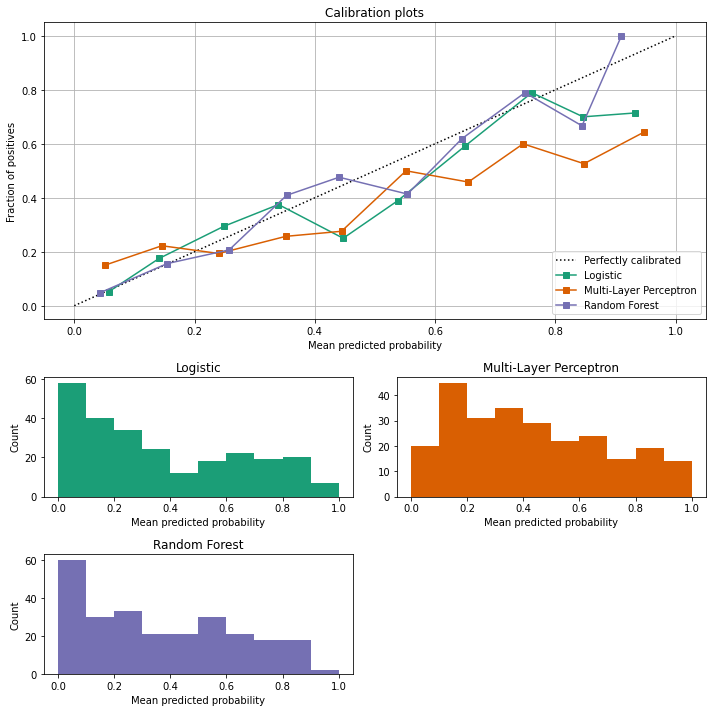

In [29]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

# Adult Census DF

In [34]:
def load_adult():
    df = pd.read_csv('adult.csv')
    df = pd.get_dummies(df)
    X = df.drop(['target'], axis=1)
    y = df[['target']]
    return X, np.reshape(y, (-1, ))

X, y = load_adult()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

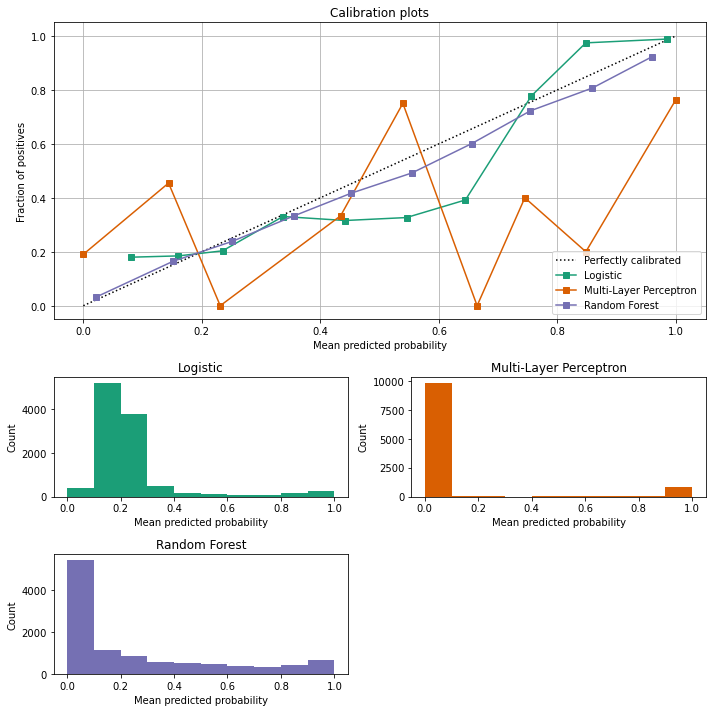

In [33]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

# 4C) Counterfactual Metrics

In [59]:
#!pip install dice-ml
import dice_ml
from dice_ml.utils import helpers

from scipy.stats import median_absolute_deviation as mad
import sklearn.metrics as metrics

#### validity

In [60]:
def validity(cf_list):
    
    validity=[]
    for i in cf_list.cf_examples_list:
        counterfactual = i.final_cfs_df
        
        if isinstance(counterfactual,type(pd.DataFrame())):
            unique = len(counterfactual.drop_duplicates())
        else:
            unique = 0

        validity_temp = unique/len(counterfactual)
        validity.append(validity_temp)

    return np.mean(validity)

#### proximity

In [61]:
def proximity(clf_list, X_train, X_test):
    proximity=[]
    mad_val = mad(X_train)
    
    def continuous_distance(counterfactual_row,og_data,mad_val):
        numerator = abs(np.array(counterfactual_row - og_data))
        denominator = np.array(mad_val)
        summation = sum(numerator/denominator)
        features = len(counterfactual_row)
        return summation/features
    
    count = 0
    for i in clf_list.cf_examples_list: #value 15
        counterfactual = i.final_cfs_df
        og_data = X_test.iloc[count]
        count+=1
        
        summation = []  
        for counter in range(len(counterfactual)):
            counterfactual_row = counterfactual.iloc[counter,:counterfactual.shape[1]-1]
            distance = continuous_distance(counterfactual_row=counterfactual_row,og_data=og_data,mad_val = mad_val)
            summation.append(distance)
     
        
        proximity.append(-1*(sum(summation)/len(counterfactual)))    
        
    return np.mean(proximity)

#### Sparsity

In [64]:
def sparsity(clf_list, X_test):
    count = 0
    sparsity = []
    for i in clf_list.cf_examples_list:
        
        
        counterfactual = i.final_cfs_df
        k = len(counterfactual)
        d = counterfactual.shape[1]-1
        
        og_data = X_test.iloc[count]
        count +=1
        
        num_diff = []
        for counter in range(len(counterfactual)):
            counterfactual_row = counterfactual.iloc[counter,:counterfactual.shape[1]-1]
            difference = np.array(counterfactual_row - og_data)
            count_diff = 0
            for num in difference:
                if num != 0:
                    count_diff +=1
            
            num_diff.append(count_diff)
        
        sparsity_calc = 1- (sum(num_diff)/k/d)
        sparsity.append(sparsity_calc)
        return np.mean(sparsity)

In [71]:
X_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
14160,27,160178,10,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
27048,45,50567,9,0,0,40,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
28868,29,185908,13,0,0,55,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5667,30,190040,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7827,29,189346,10,2202,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,22,320451,10,0,0,24,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
12129,33,70447,9,0,0,40,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
12017,65,24824,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
22468,42,175674,9,0,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [106]:
trial = []

In [107]:
attempt = X_test.iloc[0]
attempt

age                  27
fnlwgt           160178
education-num        10
capital-gain          0
capital-loss          0
                  ...  
race_ Black           0
race_ Other           0
race_ White           1
sex_ Female           1
sex_ Male             0
Name: 14160, Length: 66, dtype: int64

##### Diversity

In [80]:
X_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
14160,27,160178,10,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
27048,45,50567,9,0,0,40,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
28868,29,185908,13,0,0,55,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5667,30,190040,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7827,29,189346,10,2202,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,22,320451,10,0,0,24,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
12129,33,70447,9,0,0,40,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
12017,65,24824,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
22468,42,175674,9,0,0,60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [81]:
def distributionness(clf_list):
    distributionness = []
    
    def get_mmd_rbf(X, Y, gamma=1.0):
        """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
        Arguments:
            X {[n_sample1, dim]} -- [X matrix]
            Y {[n_sample2, dim]} -- [Y matrix]
        Keyword Arguments:
            gamma {float} -- [kernel parameter] (default: {1.0})
        Returns:
            [scalar] -- [MMD value]
        """
        XX = metrics.pairwise.rbf_kernel(X, X, gamma)
        YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
        XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
        return XX.mean() + YY.mean() - 2 * XY.mean()

    
    for i in clf_list.cf_examples_list:
        counterfactual = i.final_cfs_df
        test_data = i.test_instance_df
        x = np.array(counterfactual)
        y = np.array(test_data)
        

        calc = get_mmd_rbf(X=x, Y=y, gamma=1.0)
        
        distributionness.append(calc)
    return np.mean(distributionness)

### Diabetes

In [85]:
def load_diabetes():
    df = pd.read_csv('diabetes.csv')
    X = df.drop(['Outcome'], axis=1)
    y = df[['Outcome']]
    return X, np.reshape(y, (-1,1))

X, y = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
dataset=np.concatenate([X, y],axis=1)
dataset=pd.DataFrame(dataset,columns=X.columns.to_list()+['outcome'])

In [87]:
dice_exp_dataset_dict={}

for i, (clf, name) in enumerate(clf_list):
    
    dice = dice_ml.Data(dataframe=dataset, 
                   continuous_features=X.columns.to_list(), 
                   outcome_name='outcome')
    
    clf = clf.fit(X_train, y_train)
    
    backend = 'sklearn'
    model = dice_ml.Model(model=clf, backend=backend)
    
    #First 15 isntances from the test set
    query_instances = X_test[:15] 
    
    ## RANDOM
    random = dice_ml.Dice(dice, model, method="random")
    generate_cf_r = random.generate_counterfactuals(query_instances, 
                                                      total_CFs=5,
                                                      desired_class="opposite",
                                                      verbose=True)
    
    
    dice_exp_dataset_dict['Random '+name+' Diabetes']=generate_cf_r
    
    ## GENETIC
    genetic = dice_ml.Dice(dice, model, method="genetic")
    generate_cf_g = genetic.generate_counterfactuals(query_instances, total_CFs=5,
                                                        desired_class="opposite",
                                                        verbose=True)
    
    dice_exp_dataset_dict['Genetic '+name+' Diabetes']=generate_cf_g


C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 13%|███████████                                                                        | 2/15 [00:00<00:01,  8.16it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 33%|███████████████████████████▋                                                       | 5/15 [00:00<00:01,  7.89it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 47%|██████████████████████████████████████▋                                            | 7/15 [00:00<00:01,  7.68it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:01<00:00,  7.28it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:01<00:00,  7.99it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:01<00:00,  7.86it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 20%|████████████████▌                                                                  | 3/15 [00:00<00:01, 10.78it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...

 33%|███████████████████████████▋                                                       | 5/15 [00:00<00:00, 10.01it/s]


Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 47%|██████████████████████████████████████▋                                            | 7/15 [00:00<00:00, 10.44it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:03<00:01,  2.60it/s]

Only 4 (required 5)  Diverse Counterfactuals found for the given configuation, perhaps  change the query instance or the features to vary...; total time taken: 00 min 02 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:03<00:00,  3.04it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:03<00:00,  4.11it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:03<00:00,  3.93it/s]
C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Diverse Counterfactuals found! total time taken: 00 min 00 sec


C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  )
 13%|███████████                                                                        | 2/15 [00:00<00:01,  8.98it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 27%|██████████████████████▏                                                            | 4/15 [00:00<00:01,  7.05it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 40%|█████████████████████████████████▏                                                 | 6/15 [00:00<00:01,  7.27it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:01<00:01,  6.88it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:01<00:00,  6.76it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:01<00:00,  6.42it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:02<00:00,  6.67it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


  7%|█████▌                                                                             | 1/15 [00:00<00:01,  9.67it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 20%|████████████████▌                                                                  | 3/15 [00:00<00:01,  8.73it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 33%|███████████████████████████▋                                                       | 5/15 [00:00<00:01,  9.27it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 47%|██████████████████████████████████████▋                                            | 7/15 [00:00<00:00,  9.66it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:00<00:00,  9.71it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:01<00:00,  9.84it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:01<00:00,  9.76it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:01<00:00,  9.70it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec



<ipython-input-87-6c4066cc2b41>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train, y_train)
  7%|█████▌                                                                             | 1/15 [00:00<00:03,  4.09it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 13%|███████████                                                                        | 2/15 [00:00<00:03,  3.35it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 20%|████████████████▌                                                                  | 3/15 [00:00<00:03,  3.34it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 27%|██████████████████████▏                                                            | 4/15 [00:01<00:02,  3.68it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 33%|███████████████████████████▋                                                       | 5/15 [00:01<00:02,  3.51it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 40%|█████████████████████████████████▏                                                 | 6/15 [00:01<00:02,  3.44it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 47%|██████████████████████████████████████▋                                            | 7/15 [00:02<00:02,  2.81it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:02<00:02,  3.04it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:02<00:02,  2.78it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:03<00:02,  2.40it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:03<00:01,  2.40it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:04<00:01,  2.20it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:04<00:00,  2.50it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:05<00:00,  2.09it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


  7%|█████▌                                                                             | 1/15 [00:00<00:03,  3.91it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 13%|███████████                                                                        | 2/15 [00:00<00:03,  4.08it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 20%|████████████████▌                                                                  | 3/15 [00:00<00:02,  4.17it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 27%|██████████████████████▏                                                            | 4/15 [00:00<00:02,  4.17it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 33%|███████████████████████████▋                                                       | 5/15 [00:01<00:02,  4.14it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 40%|█████████████████████████████████▏                                                 | 6/15 [00:01<00:02,  4.15it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 47%|██████████████████████████████████████▋                                            | 7/15 [00:01<00:01,  4.16it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:01<00:01,  4.20it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:02<00:01,  4.08it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:02<00:01,  4.04it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:02<00:00,  4.08it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:02<00:00,  4.11it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:03<00:00,  4.10it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:03<00:00,  4.15it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:03<00:00,  4.13it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


In [88]:
dice_exp_dataset_dict

import sklearn.metrics as metrics

lt_metrics=['validity','proximity','sparsity','diversity','in_dist']
df_metrics=pd.DataFrame(index=dice_exp_dataset_dict.keys(),
    columns=lt_metrics)

validity_final = []
proximity_final = []
sparsity_final = []
#diversity_final = []
distributionness_final = []

for k in dice_exp_dataset_dict.keys():
    validity_numbers = validity(dice_exp_dataset_dict[k])
    validity_final.append(validity_numbers)
    
    proximity_numbers = proximity(dice_exp_dataset_dict[k],X_train=X_train, X_test=X_test)
    proximity_final.append(proximity_numbers)
    
    sparcity_numbers = sparsity(dice_exp_dataset_dict[k], X_test=X_test)
    sparsity_final.append(sparcity_numbers)
    
    distributionness_numbers = distributionness(dice_exp_dataset_dict[k])
    distributionness_final.append(distributionness_numbers)

<ipython-input-61-25913ed8341d>:3: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  mad_val = mad(X_train)
<ipython-input-61-25913ed8341d>:3: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  mad_val = mad(X_train)
<ipython-input-61-25913ed8341d>:3: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_

In [93]:
# FORMAT DATAFRAME
df_metrics=pd.DataFrame(index=dice_exp_dataset_dict.keys(),columns=lt_metrics)
df_metrics['validity']=validity_final
df_metrics['proximity']=proximity_final
df_metrics['sparsity']=sparsity_final
#df_metrics['diversity']=diversity_final
df_metrics['in_dist']=distributionness_final
df_metrics

,validity,proximity,sparsity,diversity,in_dist
Random Logistic Adult,1.0,-0.731329,0.775,NaN,1.199199
Genetic Logistic Adult,1.0,-0.739535,0.150,NaN,1.064229
Random Multi-Layer Perceptron Adult,1.0,-0.671006,0.775,NaN,1.205046
Genetic Multi-Layer Perceptron Adult,1.0,-0.645075,0.400,NaN,1.015035
Random Random Forest Adult,1.0,-0.704203,0.800,NaN,1.192434
Genetic Random Forest Adult,1.0,-0.647544,0.175,NaN,1.068142


### Adult Census

In [94]:
def load_adult():
    df = pd.read_csv('adult.csv')
    df = pd.get_dummies(df)
    X = df.drop(['target'], axis=1)
    y = df[['target']]
    return X, np.reshape(y, (-1, ))

X, y = load_adult()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
dataset=np.concatenate([X, y],axis=1)
dataset=pd.DataFrame(dataset,columns=X.columns.to_list()+['outcome'])

In [96]:
dice_exp_dataset_dict={}

for i, (clf, name) in enumerate(clf_list):
    
    dice = dice_ml.Data(dataframe=dataset, 
                   continuous_features=X.columns.to_list(), 
                   outcome_name='outcome')
    
    clf = clf.fit(X_train, y_train)
    
    backend = 'sklearn'
    
    model = dice_ml.Model(model=clf, backend=backend)
    
    #First 15 isntances from the test set
    query_instances = X_test[:15] 
    
    ## RANDOM
    random = dice_ml.Dice(dice, model, method="random")
    generate_cf_r = random.generate_counterfactuals(query_instances, 
                                                      total_CFs=5,
                                                      desired_class="opposite",
                                                      verbose=True)
    
    
    dice_exp_dataset_dict['Random '+name+' Adult']=generate_cf_r
    
    ## GENETIC
    genetic = dice_ml.Dice(dice, model, method="genetic")
    generate_cf_g = genetic.generate_counterfactuals(query_instances, total_CFs=5,
                                                        desired_class="opposite",
                                                        verbose=True)
    
    dice_exp_dataset_dict['Genetic '+name+' Adult']=generate_cf_g


C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
  7%|█████▌                                                                             | 1/15 [00:00<00:03,  4.53it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 20%|████████████████▌                                                                  | 3/15 [00:00<00:02,  4.27it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 27%|██████████████████████▏                                                            | 4/15 [00:00<00:02,  4.08it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 40%|█████████████████████████████████▏                                                 | 6/15 [00:01<00:02,  4.26it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 47%|██████████████████████████████████████▋                                            | 7/15 [00:01<00:02,  3.95it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:01<00:01,  3.94it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:02<00:01,  4.03it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:02<00:01,  3.95it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:02<00:00,  4.11it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:02<00:00,  4.18it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:03<00:00,  4.17it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:03<00:00,  4.17it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


  7%|█████▌                                                                             | 1/15 [00:00<00:09,  1.56it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 13%|███████████                                                                        | 2/15 [00:01<00:07,  1.69it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00

 20%|████████████████▌                                                                  | 3/15 [00:01<00:07,  1.68it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 27%|██████████████████████▏                                                            | 4/15 [00:02<00:06,  1.67it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 33%|███████████████████████████▋                                                       | 5/15 [00:03<00:06,  1.65it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 40%|█████████████████████████████████▏                                                 | 6/15 [00:03<00:05,  1.61it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 47%|██████████████████████████████████████▋                                            | 7/15 [00:04<00:04,  1.64it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:04<00:04,  1.67it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:05<00:03,  1.72it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:05<00:02,  1.75it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:06<00:02,  1.78it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:07<00:01,  1.78it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:07<00:01,  1.78it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:08<00:00,  1.77it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:08<00:00,  1.71it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec



C:\Users\Emilio Cabrera\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
  7%|█████▌                                                                             | 1/15 [00:00<00:03,  4.11it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 20%|████████████████▌                                                                  | 3/15 [00:00<00:03,  3.87it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 27%|██████████████████████▏                                                            | 4/15 [00:01<00:02,  3.91it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 40%|█████████████████████████████████▏                                                 | 6/15 [00:01<00:02,  3.68it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 47%|██████████████████████████████████████▋                                            | 7/15 [00:01<00:02,  3.68it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:02<00:01,  3.82it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:02<00:01,  3.80it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:02<00:01,  3.80it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:02<00:01,  3.85it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:03<00:00,  3.83it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:03<00:00,  3.79it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:03<00:00,  3.76it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


  7%|█████▌                                                                             | 1/15 [00:00<00:09,  1.47it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 13%|███████████                                                                        | 2/15 [00:01<00:08,  1.54it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 20%|████████████████▌                                                                  | 3/15 [00:01<00:07,  1.55it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 27%|██████████████████████▏                                                            | 4/15 [00:02<00:06,  1.58it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 33%|███████████████████████████▋                                                       | 5/15 [00:03<00:06,  1.60it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 40%|█████████████████████████████████▏                                                 | 6/15 [00:03<00:05,  1.61it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 47%|██████████████████████████████████████▋                                            | 7/15 [00:04<00:04,  1.61it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:05<00:04,  1.58it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:05<00:03,  1.59it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:06<00:03,  1.59it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:06<00:02,  1.59it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:07<00:01,  1.56it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:08<00:01,  1.56it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:08<00:00,  1.57it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:09<00:00,  1.58it/s]
<ipython-input-96-8dcb74299ce6>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train, y_train)
  7%|█████▌                                                                             | 1/15 [00:00<00:04,  2.86it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 13%|███████████                                                                        | 2/15 [00:00<00:04,  2.86it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 20%|████████████████▌                                                                  | 3/15 [00:01<00:04,  2.86it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 27%|██████████████████████▏                                                            | 4/15 [00:01<00:03,  2.91it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 33%|███████████████████████████▋                                                       | 5/15 [00:01<00:03,  2.87it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 40%|█████████████████████████████████▏                                                 | 6/15 [00:02<00:03,  2.85it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 47%|██████████████████████████████████████▋                                            | 7/15 [00:02<00:03,  2.46it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:02<00:02,  2.58it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:03<00:02,  2.66it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:03<00:01,  2.70it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:04<00:01,  2.75it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:04<00:01,  2.79it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:04<00:00,  2.80it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:05<00:00,  2.84it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


  7%|█████▌                                                                             | 1/15 [00:01<00:20,  1.43s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 13%|███████████                                                                        | 2/15 [00:02<00:18,  1.42s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 20%|████████████████▌                                                                  | 3/15 [00:04<00:16,  1.41s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 27%|██████████████████████▏                                                            | 4/15 [00:05<00:15,  1.41s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 33%|███████████████████████████▋                                                       | 5/15 [00:07<00:14,  1.40s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 40%|█████████████████████████████████▏                                                 | 6/15 [00:08<00:12,  1.40s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 47%|██████████████████████████████████████▋                                            | 7/15 [00:09<00:11,  1.40s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:11<00:09,  1.41s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:12<00:08,  1.41s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:14<00:07,  1.40s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:15<00:05,  1.40s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:16<00:04,  1.40s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:18<00:02,  1.41s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:19<00:01,  1.40s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:21<00:00,  1.41s/it]

Diverse Counterfactuals found! total time taken: 00 min 01 sec


In [97]:
dice_exp_dataset_dict.keys()

dict_keys(['Random Logistic Adult', 'Genetic Logistic Adult', 'Random Multi-Layer Perceptron Adult', 'Genetic Multi-Layer Perceptron Adult', 'Random Random Forest Adult', 'Genetic Random Forest Adult'])

In [98]:
dice_exp_dataset_dict['Random Logistic Adult'].cf_examples_list[0].visualize_as_dataframe()

Query instance (original outcome : 0)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,outcome
0,27,160178,10,0,0,38,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0



Diverse Counterfactual set (new outcome: 1.0)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,outcome
0,27,160178,10,39166,0,38,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,27,160178,10,79514,0,38,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,27,160178,10,66544,0,38,0,0,0,0,...,0,0,0,1,0,0,1,1,0,1
3,27,160178,10,39166,0,38,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
4,27,160178,10,39121,0,38,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1


In [99]:
dice_exp_dataset_dict

import sklearn.metrics as metrics

lt_metrics=['validity','proximity','sparsity','diversity','in_dist']
df_metrics=pd.DataFrame(index=dice_exp_dataset_dict.keys(),
    columns=lt_metrics)

validity_final = []
proximity_final = []
sparsity_final = []
#diversity_final = []
distributionness_final = []

for k in dice_exp_dataset_dict.keys():
    validity_numbers = validity(dice_exp_dataset_dict[k])
    validity_final.append(validity_numbers)
    
    proximity_numbers = proximity(dice_exp_dataset_dict[k],X_train=X_train, X_test=X_test)
    proximity_final.append(proximity_numbers)
    
    sparcity_numbers = sparsity(dice_exp_dataset_dict[k], X_test=X_test)
    sparsity_final.append(sparcity_numbers)
    
    distributionness_numbers = distributionness(dice_exp_dataset_dict[k])
    distributionness_final.append(distributionness_numbers)

<ipython-input-61-25913ed8341d>:3: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  mad_val = mad(X_train)
<ipython-input-61-25913ed8341d>:8: RuntimeWarning: divide by zero encountered in true_divide
  summation = sum(numerator/denominator)
<ipython-input-61-25913ed8341d>:8: RuntimeWarning: invalid value encountered in true_divide
  summation = sum(numerator/denominator)
<ipython-input-61-25913ed8341d>:3: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for sca

In [100]:
# FORMAT DATAFRAME
df_metrics=pd.DataFrame(index=dice_exp_dataset_dict.keys(),columns=lt_metrics)
df_metrics['validity']=validity_final
df_metrics['proximity']=proximity_final
df_metrics['sparsity']=sparsity_final
#df_metrics['diversity']=diversity_final
df_metrics['in_dist']=distributionness_final
df_metrics

,validity,proximity,sparsity,diversity,in_dist
Random Logistic Adult,1.0,NaN,0.978788,NaN,1.216418
Genetic Logistic Adult,1.0,NaN,0.863636,NaN,1.146667
Random Multi-Layer Perceptron Adult,1.0,NaN,0.975758,NaN,1.200000
Genetic Multi-Layer Perceptron Adult,1.0,NaN,0.872727,NaN,1.146765
Random Random Forest Adult,1.0,NaN,0.981818,NaN,1.184712
Genetic Random Forest Adult,1.0,NaN,0.857576,NaN,1.041253
